In [1]:
#!unzip 'drive/MyDrive/Projects-structured/Water_Quality/archive_6.zip' -d 'drive/MyDrive/Projects-structured/Water_Quality'

# Water Quality (Safe to Drink or Not)
1. Problem Definition
-> Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions. 
-> We are going to consider the following 'Features' to indicate whether a particular water is safe to drink or not.

2. Data
-> This Dataset regarding Water Quality is from kaggle:

* The water_potability.csv file contains water quality metrics for 3276 different water bodies.

https://www.kaggle.com/datasets/adityakadiwal/water-potability

3. Evaluation
-> Use the factor of accuracy and try to get it to 80-90 %

4. Features

1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

In [2]:
!pip install missingno

In [3]:
#Import Some Necessary Tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [4]:
df=pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
#Lets check for missing values
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

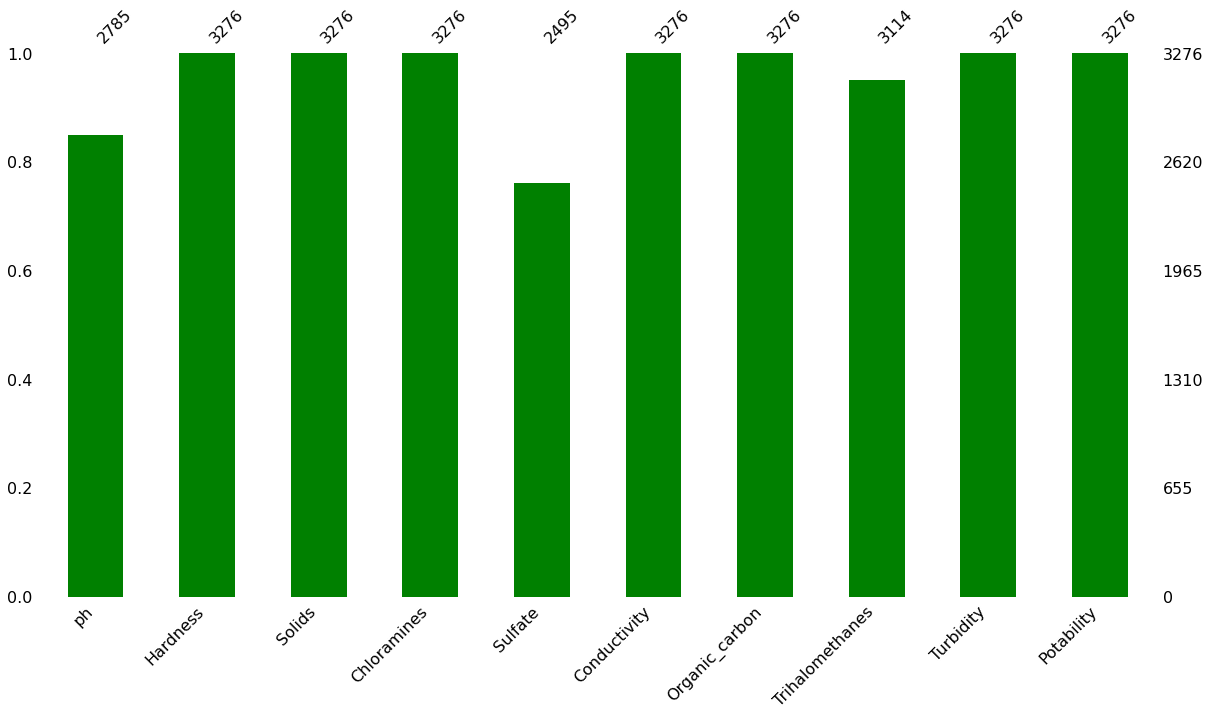

In [7]:
#lets visualize the missing values
miss=msno.bar(df,figsize=(20,10),color='g')
plt.show()

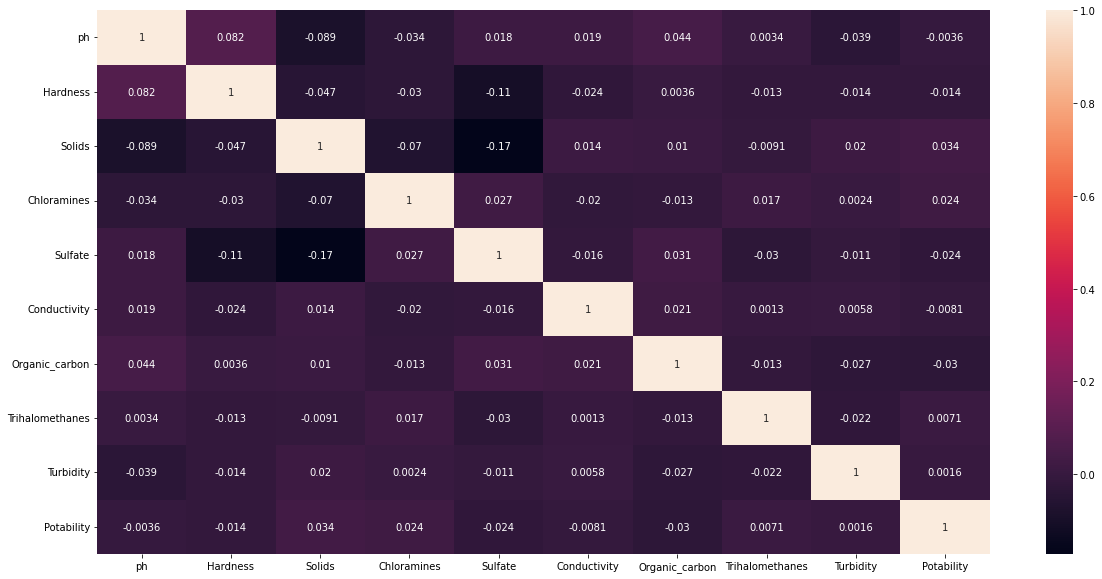

In [8]:
#Lets check for correlation cofficient
fig , ax = plt.subplots(figsize=(20,10))
co=sns.heatmap(df.corr(),
               annot=True)

In [9]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [10]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Lets try for pie plot for Potability

In [11]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [12]:
p=pd.DataFrame({'State':['Not Potability','Potability'],'Quantity':df['Potability'].value_counts()})
p.head()

,State,Quantity
0,Not Potability,1998
1,Potability,1278


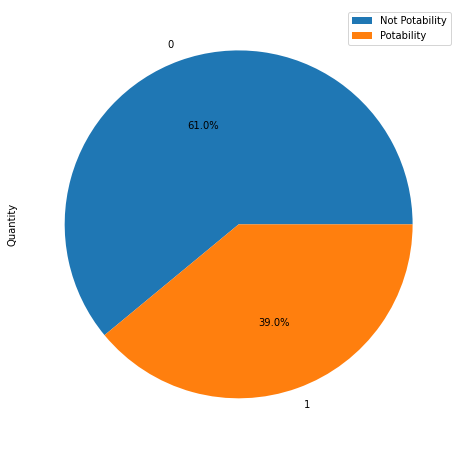

In [13]:
p['Quantity'].plot(kind="pie", autopct='%1.1f%%',figsize=(8,8))
plt.legend(p['State']);

In [14]:
df['Conductivity']

0       564.308654
1       592.885359
2       418.606213
3       363.266516
4       398.410813
           ...    
3271    526.424171
3272    392.449580
3273    432.044783
3274    402.883113
3275    327.459760
Name: Conductivity, Length: 3276, dtype: float64

# Lets get our data ready for ML model

In [15]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [16]:
# it seems better to drofna for 'Trihalomethanes'
df.dropna(subset=['Trihalomethanes'],axis=0,inplace=True)

In [17]:
df.isna().sum()

ph                 465
Hardness             0
Solids               0
Chloramines          0
Sulfate            741
Conductivity         0
Organic_carbon       0
Trihalomethanes      0
Turbidity            0
Potability           0
dtype: int64

In [18]:
print('mean PH : ',np.mean(df['ph']),
      '\nMedian PH : ',np.median(df['ph'])
      )

mean PH :  7.080149389109656 
Median PH :  nan


In [19]:
print('mean PH : ',np.mean(df['Sulfate']),
      '\nMedian PH : ',np.median(df['Sulfate'])
      )

mean PH :  333.6420045459059 
Median PH :  nan


In [20]:
df['ph'].fillna(np.mean(df['ph']),inplace=True)

In [21]:
df['Sulfate'].fillna(np.mean(df['Sulfate']),inplace=True)

In [22]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [23]:
# make sure all features are numeric
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

### Split the Data

In [24]:
x=df.drop('Potability',axis=1)
y=df['Potability']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Modelling
* We are going to use three models 
1. tree.DecisionTreeClassifier()
2. ensemble.RandomForestClassifier()
3. linear_model.LogisticRegression(
4. sklearn.neighbors.Kneigbor

In [25]:
model_scores={}
np.random.seed(42)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# import xgboost as xgb
t_model_base=DecisionTreeClassifier()
t_model_base.fit(x_train,y_train)
model_scores['DecisionTreeClassifier']=t_model_base.score(x_test,y_test)

r_model_base=RandomForestClassifier()
r_model_base.fit(x_train,y_train)
model_scores['RandomForestClassifier']=r_model_base.score(x_test,y_test)

k_model_base=KNeighborsClassifier()
k_model_base.fit(x_train,y_train)
model_scores['KNeighborsClassifier']=k_model_base.score(x_test,y_test)

l_model_base=LogisticRegression()
l_model_base.fit(x_train,y_train)
model_scores['LogisticRegression']=l_model_base.score(x_test,y_test)
model_scores

{'DecisionTreeClassifier': 0.565008025682183,
 'RandomForestClassifier': 0.6565008025682183,
 'KNeighborsClassifier': 0.5457463884430177,
 'LogisticRegression': 0.5922953451043339}

In [26]:
#RandomForestClassifier
r_model_base.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [31]:
from sklearn.model_selection import GridSearchCV
forest_grid = {
              'criterion':['gini', 'entropy', 'log_loss'],
              'max_depth' : [None,5,15,3],
              'min_samples_split' :[2,9,15],
              'min_samples_leaf' : [1,7,12],
              'max_features' : ['sqrt', 'log2', None],
              'n_jobs':[-1],
              'class_weight':['balanced', 'balanced_subsample']
             }
r_model=GridSearchCV(estimator=RandomForestClassifier(),
                     param_grid=forest_grid,
                     cv=5,
                     verbose=True)
r_model.fit(x_train,y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 15, 3],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 7, 12],
                         'min_samples_split': [2, 9, 15], 'n_jobs': [-1]},
             verbose=True)

In [32]:
r_model.score(x_test,y_test)

0.6340288924558587

### GradientBoostingClassifier 

In [27]:
np.random.seed(42)
from sklearn.ensemble import GradientBoostingClassifier
g_model_base=GradientBoostingClassifier()
g_model_base.fit(x_train,y_train)
model_scores['GradientBoostingClassifier']=g_model_base.score(x_test,y_test)

### SVC

In [28]:
np.random.seed(42)
from sklearn.svm import SVC
s_model_base=SVC()
s_model_base.fit(x_train,y_train)
model_scores['SVC']=s_model_base.score(x_test,y_test)

### GaussianNB 

In [29]:
np.random.seed(42)
from sklearn.naive_bayes import GaussianNB
gu_model_base=GaussianNB()
gu_model_base.fit(x_train,y_train)
model_scores['GaussianNB']=gu_model_base.score(x_test,y_test)

In [30]:
model_scores

{'DecisionTreeClassifier': 0.565008025682183,
 'RandomForestClassifier': 0.6565008025682183,
 'KNeighborsClassifier': 0.5457463884430177,
 'LogisticRegression': 0.5922953451043339,
 'GradientBoostingClassifier': 0.6404494382022472,
 'SVC': 0.5922953451043339,
 'GaussianNB': 0.5971107544141252}